<a href="https://colab.research.google.com/github/christinaxliu/research/blob/main/JPL-Caltech/StellarSystemClassification/StellarSystemClassification-K-Type-0.6-0.8-Solar-Mass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import division

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
import warnings
from google.colab import drive

In [2]:
pd.options.mode.copy_on_write = True
warnings.filterwarnings("ignore")

In [129]:
# Constants and methods for plotting graphs

# Mapping from exoplanet type to the corresponding color in the plotting graph
exoplanet_type_colors = {
    'Gas-Giant': 'wheat',
    'Neptune-Like': 'lightsteelblue',
    'Super-Earth': 'salmon',
    'Terrestrial': 'cyan'
}

# Mapping from exoplanet type to the corresponding legend title in the plotting graph
exoplanet_type_labels = {
    'Gas-Giant': 'Gas Giants (1,746 in total)',
    'Neptune-Like': 'Neptune Like Planets (1,942 in total)',
    'Super-Earth': 'Super Earths (1,702 in total)',
    'Terrestrial': 'Terrestrial Planets (201 in total)'
}

sun_like_k_star_host_exoplanet_type_labels = {
    'Gas-Giant': 'Gas Giants (59 in total)',
    'Neptune-Like': 'Neptune Like Planets (60 in total)',
    'Super-Earth': 'Super Earths (52 in total)',
    'Terrestrial': 'Terrestrial Planets (3 in total)'
}

stellar_system_exoplanet_type_labels = {
    'Gas-Giant': 'Gas Giants',
    'Neptune-Like': 'Neptune Like Planets',
    'Super-Earth': 'Super Earths',
    'Terrestrial': 'Terrestrial Planets'
}

solar_system_planets_colors = {
    'Mercury': 'gray',
    'Venus': 'goldenrod',
    'Earth': 'royalblue',
    'Mars': 'orangered',
    'Jupiter': 'peru',
    'Saturn': 'gold',
    'Uranus': 'powderblue',
    'Neptune': 'deepskyblue'
}

solar_system_planets_labels = {
    'Mercury': 'Mercury',
    'Venus': 'Venus',
    'Earth': 'Earth',
    'Mars': 'Mars',
    'Jupiter': 'Jupiter',
    'Saturn': 'Saturn',
    'Uranus': 'Uranus',
    'Neptune': 'Neptune'
}

exoplanet_type_colors_with_solar_system_planets = {
    'Gas-Giant': 'wheat',
    'Neptune-Like': 'lightsteelblue',
    'Super-Earth': 'salmon',
    'Terrestrial': 'cyan',
    'Mercury': 'gray',
    'Venus': 'goldenrod',
    'Earth': 'royalblue',
    'Mars': 'orangered',
    'Jupiter': 'peru',
    'Saturn': 'gold',
    'Uranus': 'powderblue',
    'Neptune': 'deepskyblue'
}

exoplanet_type_labels_with_solar_system_planets = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'Mercury': 'Mercury',
    'Venus': 'Venus',
    'Earth': 'Earth',
    'Mars': 'Mars',
    'Jupiter': 'Jupiter',
    'Saturn': 'Saturn',
    'Uranus': 'Uranus',
    'Neptune': 'Neptune'
}

exoplanet_type_with_hz_colors = {
    'Gas-Giant': 'wheat',
    'Neptune-Like': 'lightsteelblue',
    'Super-Earth': 'salmon',
    'Terrestrial': 'cyan',
    'HabitableZone-Planets': 'lime'
}

exoplanet_type_with_hz_labels = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)'
}

exoplanet_type_with_hz_colors_with_earth = {
    'Gas-Giant': 'wheat',
    'Neptune-Like': 'lightsteelblue',
    'Super-Earth': 'salmon',
    'Terrestrial': 'cyan',
    'HabitableZone-Planets': 'lime',
    'Earth': 'lime'
}

exoplanet_type_with_hz_labels_with_earth = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)',
    'Earth': 'Earth'
}

exoplanet_type_with_hz_zone_inner_colors = {
    'Gas-Giant': 'red',
    'Neptune-Like': 'red',
    'Super-Earth': 'red',
    'Terrestrial': 'red',
    'HabitableZone-Planets': 'red'
}

exoplanet_type_with_hz_zone_inner_labels = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)'
}

exoplanet_type_with_hz_zone_outer_colors = {
    'Gas-Giant': 'blue',
    'Neptune-Like': 'blue',
    'Super-Earth': 'blue',
    'Terrestrial': 'blue',
    'HabitableZone-Planets': 'blue'
}

exoplanet_type_with_hz_zone_outer_labels = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)'
}

# Plot selected exoplanets with sizeable circles in proportion to the exoplanets' radii
def plot_selected_exoplanets_with_size_and_label(ax, #axes object for plotting graph
                                  exoplanets_data, # DataFrame object that contains exoplanet data
                                  x_field, # Data field for x axis
                                  y_field, # Data field for y axis
                                  size_field, # Data field for the star size
                                  is_selected, # Whether the current data entry is selected or not
                                  color, # Color for the data points in the graph
                                  edgecolors, # Edge color for the data points in the graph
                                  label, # Legend lable for the data points in the graph
                                  scale_size # Scale proportion for circle representing star in graph
                                  ):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = exoplanets_data[size_field][is_selected] * scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               label=label)

def plot_selected_exoplanets_with_size(ax, #axes object for plotting graph
                                  exoplanets_data, # DataFrame object that contains exoplanet data
                                  x_field, # Data field for x axis
                                  y_field, # Data field for y axis
                                  size_field, # Data field for the star size
                                  is_selected, # Whether the current data entry is selected or not
                                  color, # Color for the data points in the graph
                                  edgecolors, # Edge color for the data points in the graph
                                  scale_size, # Scale proportion for circle representing star in graph
                                  linewidths=None
                                  ):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = exoplanets_data[size_field][is_selected] * scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               linewidths=linewidths)

def plot_exoplanets_with_size_only(ax,
                                   exoplanets_data,
                                   x_field,
                                   y_field,
                                   size_field,
                                   type_field,
                                   hz_status_field,
                                   scale_size,
                                   edgecolors,
                                   linewidths,
                                   exoplanet_color_map,
                                   exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
        plot_selected_exoplanets_with_size(ax=ax,
                                           exoplanets_data=exoplanets_data,
                                           x_field=x_field,
                                           y_field=y_field,
                                           size_field=size_field,
                                           is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                           color=exoplanet_color_map[exoplanet_type],
                                           edgecolors=edgecolors,
                                           scale_size=scale_size,
                                           linewidths=linewidths)

def plot_exoplanets_with_size_and_label(ax, exoplanets_data, x_field, y_field, size_field, type_field, hz_status_field, scale_size, edgecolors, exoplanet_color_map, exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
            plot_selected_exoplanets_with_size_and_label(ax=ax,
                                      exoplanets_data=exoplanets_data,
                                      x_field=x_field,
                                      y_field=y_field,
                                      size_field=size_field,
                                      is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                      color=exoplanet_color_map[exoplanet_type],
                                      edgecolors=edgecolors,
                                      label=exoplanet_label_map[exoplanet_type],
                                      scale_size=scale_size)

def plot_selected_exoplanet_hz_zones(ax,
                                     exoplanets_data,
                                     x_field,
                                     y_field,
                                     is_selected,
                                     color,
                                     edgecolors,
                                     scale_size,
                                     alpha):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               alpha=alpha)

def plot_exoplanet_hz_zones(ax,
                            exoplanets_data,
                            x_field,
                            y_field,
                            type_field,
                            scale_size,
                            alpha,
                            exoplanet_color_map,
                            exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
        plot_selected_exoplanet_hz_zones(ax=ax,
                                         exoplanets_data=exoplanets_data,
                                         x_field=x_field,
                                         y_field=y_field,
                                         is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                         color=exoplanet_color_map[exoplanet_type],
                                         edgecolors=exoplanet_color_map[exoplanet_type],
                                         scale_size=scale_size,
                                         alpha=alpha)

# Plot a stellar system in the graph
def plot_a_stellar_system(st_mass_vs_pl_orbit_plot_data,
                          subplot_xlim_min,
                          subplot_xlim_max,
                          subplot_ylim_min,
                          subplot_ylim_max,
                          plot_title,
                          exoplanet_color_map,
                          exoplanet_label_map,
                          legend_loc='lower right'):
    fig = plt.figure(figsize=(11,6))
    ax = fig.add_subplot(111, facecolor='0.99', xscale='log')

    ax.set_xlim(subplot_xlim_min, subplot_xlim_max)
    ax.set_ylim(subplot_ylim_min, subplot_ylim_max)
    ax.grid(color='0.4')
    ax.set_title(plot_title, fontweight ='bold')
    ax.title.set_fontsize(18)
    ax.set_xlabel('Exoplanet Semi-Major Axis (AU in Log)', fontweight ='bold')
    ax.xaxis.label.set_fontsize(15)
    ax.set_ylabel('Host Star Mass (Solar mass)', fontweight ='bold')
    ax.yaxis.label.set_fontsize(15)

    # Plot exoplanets
    plot_exoplanets_with_size_and_label(ax=ax,
                                        exoplanets_data=st_mass_vs_pl_orbit_plot_data,
                                        x_field='pl_orbsmax',
                                        y_field='st_mass',
                                        size_field='pl_rade',
                                        type_field='pl_type',
                                        hz_status_field='pl_hz_status',
                                        scale_size=35,
                                        edgecolors='black',
                                        exoplanet_color_map=exoplanet_color_map,
                                        exoplanet_label_map=exoplanet_label_map)

    # Plot habitable zone inner and outer boundaries
    hz_inner_boundary_x = st_mass_vs_pl_orbit_plot_data['hz_zone_inner'].to_numpy()[0]
    hz_outer_boundary_x = st_mass_vs_pl_orbit_plot_data['hz_zone_outer'].to_numpy()[0]

    plt.vlines(x=hz_inner_boundary_x,
               ymin=subplot_ylim_min,
               ymax=subplot_ylim_max,
               colors='green',
               linestyles='dashed',
               label='Habitable Zone')

    plt.vlines(x=hz_outer_boundary_x,
               ymin=subplot_ylim_min,
               ymax=subplot_ylim_max,
               colors='green',
               linestyles='dashed')

    ax.add_patch(plt.Rectangle(xy=(hz_inner_boundary_x, subplot_ylim_min),
                               width=hz_outer_boundary_x - hz_inner_boundary_x,
                               height=subplot_ylim_max - subplot_ylim_min,
                               color='lightgreen',
                               alpha=0.15))

    ax.set_yticklabels(ax.get_yticks(), weight='bold', size=15)
    ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=15)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

    legend_properties = {'size':13, 'weight':'bold'}
    legend = ax.legend(scatterpoints=1,
                      labelcolor='black',
                      loc=legend_loc,
                      markerscale=2,
                      shadow=True,
                      framealpha=0.85,
                      prop=legend_properties)
    set_legend_size(legend, len(exoplanet_label_map), 80)

    frame = legend.get_frame()
    frame.set_facecolor('0.99')

# Plot stellar systems one by one. Each stellar system is plotted in a separate graph
def plot_stellar_systems_one_by_one(plot_data,
                                    host_star_names,
                                    subplot_xlim_min,
                                    subplot_xlim_max,
                                    subplot_ylim_min,
                                    subplot_ylim_max,
                                    exoplanet_color_map,
                                    exoplanet_label_map,
                                    legend_loc='lower right'):
  for host_star_name in host_star_names:
      plot_title=f"Star Mass vs. Exoplanet Orbit Semi-Major Axis: {host_star_name} System"
      plot_data_one_stellar_system = plot_data.loc[(plot_data['hostname'] == host_star_name)]
      plot_a_stellar_system(st_mass_vs_pl_orbit_plot_data=plot_data_one_stellar_system,
                            subplot_xlim_min=subplot_xlim_min,
                            subplot_xlim_max=subplot_xlim_max,
                            subplot_ylim_min=subplot_ylim_min,
                            subplot_ylim_max=subplot_ylim_max,
                            plot_title=plot_title,
                            exoplanet_color_map=exoplanet_color_map,
                            exoplanet_label_map=exoplanet_label_map,
                            legend_loc=legend_loc)

# Plot a stellar system as a subplot specified by subplot_index in the grid
def plot_a_stellar_system_in_grid(st_mass_vs_pl_orbit_plot_data,
                                  fig,
                                  grid_rows,
                                  grid_columns,
                                  subplot_index,
                                  subplot_xlim_min,
                                  subplot_xlim_max,
                                  subplot_ylim_min,
                                  subplot_ylim_max,
                                  plot_title,
                                  exoplanet_color_map,
                                  exoplanet_label_map,
                                  legend_loc='lower right'):
    ax = fig.add_subplot(grid_rows, grid_columns, subplot_index, facecolor='0.99', xscale='log')

    ax.set_xlim(subplot_xlim_min, subplot_xlim_max)
    ax.set_ylim(subplot_ylim_min, subplot_ylim_max)
    ax.grid(color='0.4')
    ax.set_title(plot_title, fontweight ='bold')
    ax.title.set_fontsize(18)
    ax.set_xlabel('Exoplanet Semi-Major Axis (AU in Log)', fontweight ='bold')
    ax.xaxis.label.set_fontsize(15)
    ax.set_ylabel('Host Star Mass (Solar mass)', fontweight ='bold')
    ax.yaxis.label.set_fontsize(15)

    # Plot exoplanets
    plot_exoplanets_with_size_and_label(ax=ax,
                                        exoplanets_data=st_mass_vs_pl_orbit_plot_data,
                                        x_field='pl_orbsmax',
                                        y_field='st_mass',
                                        size_field='pl_rade',
                                        type_field='pl_type',
                                        hz_status_field='pl_hz_status',
                                        scale_size=35,
                                        edgecolors='black',
                                        exoplanet_color_map=exoplanet_color_map,
                                        exoplanet_label_map=exoplanet_label_map)

    # Plot habitable zone inner and outer boundaries
    hz_inner_boundary_x = st_mass_vs_pl_orbit_plot_data['hz_zone_inner'].to_numpy()[0]
    hz_outer_boundary_x = st_mass_vs_pl_orbit_plot_data['hz_zone_outer'].to_numpy()[0]

    plt.vlines(x=hz_inner_boundary_x,
               ymin=subplot_ylim_min,
               ymax=subplot_ylim_max,
               colors='green',
               linestyles='dashed',
               label='Habitable Zone')

    plt.vlines(x=hz_outer_boundary_x,
               ymin=subplot_ylim_min,
               ymax=subplot_ylim_max,
               colors='green',
               linestyles='dashed')

    ax.add_patch(plt.Rectangle(xy=(hz_inner_boundary_x, subplot_ylim_min),
                               width=hz_outer_boundary_x - hz_inner_boundary_x,
                               height=subplot_ylim_max - subplot_ylim_min,
                               color='lightgreen',
                               alpha=0.15))

    ax.set_yticklabels(ax.get_yticks(), weight='bold', size=15)
    ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=15)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

    legend_properties = {'size':13, 'weight':'bold'}
    legend = ax.legend(scatterpoints=1,
                      labelcolor='black',
                      loc=legend_loc,
                      markerscale=2,
                      shadow=True,
                      framealpha=0.85,
                      prop=legend_properties)
    set_legend_size(legend, len(exoplanet_label_map), 80)

    frame = legend.get_frame()
    frame.set_facecolor('0.99')

# Plot stellar systems in the grid, each stellar system is a subplot in the grid
def plot_stellar_systems_in_grid(plot_data,
                                 host_star_names,
                                 figsize_width,
                                 figsize_height,
                                 grid_rows,
                                 grid_columns,
                                 subplot_xlim_min,
                                 subplot_xlim_max,
                                 subplot_ylim_min,
                                 subplot_ylim_max,
                                 exoplanet_color_map,
                                 exoplanet_label_map,
                                 legend_loc='lower right'):
  fig = plt.figure(figsize=(figsize_width, figsize_height))
  subplot_index = 1
  for host_star_name in host_star_names:
      plot_title=f"Star Mass vs. Exoplanet Orbit Semi-Major Axis: {host_star_name} System"
      plot_data_one_stellar_system = plot_data.loc[(plot_data['hostname'] == host_star_name)]
      plot_a_stellar_system_in_grid(st_mass_vs_pl_orbit_plot_data=plot_data_one_stellar_system,
                                    fig=fig,
                                    grid_rows=grid_rows,
                                    grid_columns=grid_columns,
                                    subplot_index=subplot_index,
                                    plot_title=plot_title,
                                    subplot_xlim_min=subplot_xlim_min,
                                    subplot_xlim_max=subplot_xlim_max,
                                    subplot_ylim_min=subplot_ylim_min,
                                    subplot_ylim_max=subplot_ylim_max,
                                    exoplanet_color_map=exoplanet_color_map,
                                    exoplanet_label_map=exoplanet_label_map,
                                    legend_loc=legend_loc)
      subplot_index += 1

# Set legend with fixed size
def set_legend_size(legend, legend_count, legend_size):
    for i in range (legend_count):
        legend.legend_handles[i]._sizes = [legend_size]

# Helper method to generate the polynomial that fits the habitability zone boundaries
def fit_curve_with_polynomial(degreeFit, xVals, yVals):
    # Create empty matrix to fill with our X values
    X = np.zeros((degreeFit + 1, degreeFit + 1))

    # Create empty answer matrix containing each coefficient of the nth degree polynomial (a0, a1, a2, ..., an)
    a = np.zeros((degreeFit + 1, 1))

    # Create empty matrix to fill with our Y values
    Y = np.zeros((degreeFit + 1, 1))

    # Fill X Matrix
    for row in range(X.shape[0]) :
        for col in range(X.shape[1]) :
            power = row + col
            X[row][col] = np.sum(xVals**power)

    # Fill Y Matrix
    for row in range(degreeFit+1) :
        power = row
        Y[row][0] = np.sum(xVals**power * (yVals))

    # Compute the inverse of the Matrix X
    XInverse = np.linalg.inv(X)

    # Multip\ly XInverse by Y Matrix to get the answer
    ans = np.matmul(XInverse, Y)

    # Reverse order of coefficients so they're ordered from an, a(n-1), ..., a0.
    poly_coefs = ans[::-1].flatten()

    return poly_coefs

# Helper method to fit a curve
def fit_curve(curve_fit_data, x_filed, y_field, degree, num_data_points_to_gen):
    # Generate the polynomial curve that best fits with the data and get the coefficients for the polynomial
    poly_coefs = fit_curve_with_polynomial(degree, curve_fit_data[x_filed], curve_fit_data[y_field])

    # Create x coordinates between (lower limit) and (upper limit) with a specified number of points in between
    lower_limit = np.min(curve_fit_data[x_filed])
    upper_limit = np.max(curve_fit_data[x_filed])
    x = np.linspace(lower_limit, upper_limit, num_data_points_to_gen)

    # Find y-values based on the coefficients array we already found
    y = np.polyval(poly_coefs, x)

    return x, y, poly_coefs

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Exoplanet data from NASA Exoplanet Archive - Planetary Systems Composite Data on September 15th, 2024:
# https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars

exoplanets_filename = '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/StellarSystemClassification/PSCompPars_2024.09.15.csv'
exoplanets_data = pd.read_table(exoplanets_filename,
                                skiprows=89,
                                sep=',',
                                header=None,
                                index_col=None,
                                names = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
                                          'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
                                          'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
                                          'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
                                          'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
                                          'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                                          'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
                                          'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
                                          'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra', 'decstr', 'dec',
                                          'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
                                          'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2'],
                                skipfooter=0,
                                engine='python')

In [7]:
# Sanity check the first several rows of data to ensure data is read correctly
exoplanets_data.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


In [8]:
# Sanity check the last several rows of data to ensure data is read correctly.
exoplanets_data.tail()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
5751,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,4.617033,0.000023,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5752,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.258000,0.064000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5753,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.460000,0.570000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5754,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.200000,2.800000,...,-0.89630,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513
5755,xi Aql b,xi Aql,1,1,Radial Velocity,2007,Okayama Astrophysical Observatory,0,136.970000,0.110000,...,-0.55975,4.70964,0.023,-0.023,2.171,0.220,-0.220,4.42501,0.003837,-0.003837


In [9]:
# Get the statistics about the data
exoplanets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5756 entries, 0 to 5755
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5756 non-null   object 
 1   hostname         5756 non-null   object 
 2   sy_snum          5756 non-null   int64  
 3   sy_pnum          5756 non-null   int64  
 4   discoverymethod  5756 non-null   object 
 5   disc_year        5756 non-null   int64  
 6   disc_facility    5756 non-null   object 
 7   pl_controv_flag  5756 non-null   int64  
 8   pl_orbper        5480 non-null   float64
 9   pl_orbpererr1    4979 non-null   float64
 10  pl_orbpererr2    4979 non-null   float64
 11  pl_orbperlim     5480 non-null   float64
 12  pl_orbsmax       5475 non-null   float64
 13  pl_orbsmaxerr1   2863 non-null   float64
 14  pl_orbsmaxerr2   2863 non-null   float64
 15  pl_orbsmaxlim    5476 non-null   float64
 16  pl_rade          5735 non-null   float64
 17  pl_radeerr1   

In [10]:
# Cast values to corresponding data types
exoplanets_data['pl_name'] = exoplanets_data['pl_name'].astype(str)
exoplanets_data['hostname'] = exoplanets_data['hostname'].astype(str)
pd.to_numeric(exoplanets_data['sy_snum'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_pnum'], errors = "coerce")
exoplanets_data['discoverymethod'] = exoplanets_data['discoverymethod'].astype(str)
pd.to_numeric(exoplanets_data['disc_year'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_controv_flag'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbper'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbpererr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbpererr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbperlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmax'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmaxerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmaxerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmaxlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_rade'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radeerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radeerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radelim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radj'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radjerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radjerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radjlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasse'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasseerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasseerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasselim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassj'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassjerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassjerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassjlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassprov'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccen'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccenerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccenerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccenlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insol'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insolerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insolerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insollim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqt'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqterr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqterr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqtlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['ttv_flag'], errors = "coerce")
exoplanets_data['st_spectype'] = exoplanets_data['st_spectype'].astype(str)
pd.to_numeric(exoplanets_data['st_teff'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_tefferr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_tefferr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_tefflim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_rad'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_raderr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_raderr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_radlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_mass'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_masserr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_masserr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_masslim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_met'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_meterr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_meterr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_metlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_metratio'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_logg'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_loggerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_loggerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_logglim'], errors = "coerce")
exoplanets_data['rastr'] = exoplanets_data['rastr'].astype(str)
pd.to_numeric(exoplanets_data['ra'], errors = "coerce")
exoplanets_data['decstr'] = exoplanets_data['decstr'].astype(str)
pd.to_numeric(exoplanets_data['dec'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_dist'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_disterr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_disterr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_vmag'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_vmagerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_vmagerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_kmag'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_kmagerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_kmagerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_gaiamag'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_gaiamagerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_gaiamagerr2'], errors = "coerce")

,sy_gaiamagerr2
0,-0.003848
1,-0.003903
2,-0.002826
3,-0.000351
4,-0.000603
...,...
5751,-0.008937
5752,-0.008937
5753,-0.008937
5754,-0.008513


In [11]:
# Change any fields with empty spaces to NaN values so we can clean them up later on
exoplanets_data = exoplanets_data.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

In [12]:
exoplanets_data['pl_controv_flag'].value_counts()

,count
pl_controv_flag,
0,5726
1,30


In [13]:
# Only selects exoplanets with pl_controv_flag == 0
exoplanets_data = exoplanets_data.loc[(exoplanets_data['pl_controv_flag'] == 0)]

In [14]:
exoplanets_data['pl_tsurf_k'] = 1.13 * exoplanets_data['st_teff'] * ((1 - 0.306) ** 0.25) * (((exoplanets_data['st_rad'] * 696000) / (2 * exoplanets_data['pl_orbsmax'] * 149598023)) ** 0.5)
exoplanets_data['pl_tsurf_c'] = exoplanets_data['pl_tsurf_k'] - 273.15
exoplanets_data['pl_tsurf_k'].describe()

,pl_tsurf_k
count,5194.000000
mean,879.110257
std,501.248668
min,1.221287
25%,510.874764
50%,811.509877
75%,1164.062641
max,4176.941844


In [15]:
exoplanets_data.loc[(np.isnan(exoplanets_data['pl_tsurf_c'])), 'pl_hz_status'] = 'N/A'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_tsurf_c'])) & (exoplanets_data['pl_tsurf_c'] >= 0) & (exoplanets_data['pl_rade'] <= 100)), 'pl_hz_status'] = 'In HZ'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_tsurf_c'])) & (exoplanets_data['pl_tsurf_c'] > 100)), 'pl_hz_status'] = 'Too Hot'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_tsurf_c'])) & (exoplanets_data['pl_tsurf_c'] < 0)), 'pl_hz_status'] = 'Too Cold'
exoplanets_data['pl_hz_status'].value_counts()

,count
pl_hz_status,
Too Hot,4435
N/A,532
Too Cold,496
In HZ,262


In [16]:
exoplanet_types_filename = '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/StellarSystemClassification/NasaCatalogExoplanetType_2025.01.04.csv'
exoplanet_types_data = pd.read_csv(exoplanet_types_filename)
exoplanet_types_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pl_name  5800 non-null   object
 1   pl_type  5800 non-null   object
dtypes: object(2)
memory usage: 90.8+ KB


In [17]:
exoplanets_data = pd.merge(exoplanets_data,
                           exoplanet_types_data[['pl_type']],
                           how="left",
                           left_on=exoplanets_data['pl_name'].str.lower(),
                           right_on=exoplanet_types_data['pl_name'].str.lower())
exoplanets_data = exoplanets_data.drop(['key_0'], axis = 1)
exoplanets_data['pl_type'].value_counts()

,count
pl_type,
Neptune-Like,1942
Gas-Giant,1746
Super-Earth,1702
Terrestrial,201


In [18]:
#
# Solar System Temperatures Reference:
#     https://science.nasa.gov/resource/solar-system-temperatures/
#
# Sun data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html
#
# Mercury data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/mercuryfact.html
#     https://en.wikipedia.org/wiki/Mercury_(planet)
#
# Venus data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/venusfact.html
#     https://en.wikipedia.org/wiki/Venus
#
# Earth data source:
#     Orbital Eccentricity: https://en.wikipedia.org/wiki/Orbital_eccentricity
#
# Mars data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/marsfact.html
#     https://en.wikipedia.org/wiki/Orbit_of_Mars
#
# Jupiter data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
#     https://en.wikipedia.org/wiki/Jupiter
#
# Saturn data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/saturnfact.html
#     https://en.wikipedia.org/wiki/Saturn
#
# Uranus data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/uranusfact.html
#     https://en.wikipedia.org/wiki/Uranus
#
# Neptune data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/neptunefact.html
#     https://en.wikipedia.org/wiki/Neptune
#

solar_system_planets_facts_data = [['Mercury','Sun',1,8,'',0,'',0,0,0,0,0,0.387,0,0,0,0.383,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Mercury'],
                                   ['Venus','Sun',1,8,'',0,'',0,0,0,0,0,0.723,0,0,0,0.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Venus'],
                                   ['Earth','Sun',1,8,'',0,'',0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0167,0,0,0,1,0,0,0,255,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Earth'],
                                   ['Mars','Sun',1,8,'',0,'',0,0,0,0,0,1.524,0,0,0,0.532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.431,0,0,0,210,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Mars'],
                                   ['Jupiter','Sun',1,8,'',0,'',0,0,0,0,0,5.204,0,0,0,10.973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Jupiter'],
                                   ['Saturn','Sun',1,8,'',0,'',0,0,0,0,0,9.573,0,0,0,9.140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Saturn'],
                                   ['Uranus','Sun',1,8,'',0,'',0,0,0,0,0,19.165,0,0,0,3.981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Uranus'],
                                   ['Neptune','Sun',1,8,'',0,'',0,0,0,0,0,30.178,0,0,0,3.865,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Neptune']]
solar_system_planets_data_columns = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
                                          'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
                                          'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
                                          'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
                                          'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
                                          'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                                          'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
                                          'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
                                          'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra', 'decstr', 'dec',
                                          'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
                                          'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2', 'pl_tsurf_k', 'pl_tsurf_c', 'pl_hz_status', 'pl_type']
solar_system_planets_data = pd.DataFrame(solar_system_planets_facts_data, columns=solar_system_planets_data_columns)
pd.to_numeric(solar_system_planets_data['pl_rade'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['pl_insol'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['st_teff'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['st_rad'], errors = "coerce")
solar_system_planets_data

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,pl_tsurf_k,pl_tsurf_c,pl_hz_status,pl_type
0,Mercury,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Mercury
1,Venus,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Venus
2,Earth,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Earth
3,Mars,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Mars
4,Jupiter,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Jupiter
5,Saturn,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Saturn
6,Uranus,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Uranus
7,Neptune,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Neptune


In [19]:
solar_system_planets_data['pl_orbsmax']

,pl_orbsmax
0,0.387
1,0.723
2,1.000
3,1.524
4,5.204
5,9.573
6,19.165
7,30.178


In [20]:
solar_system_planets_data['pl_rade']

,pl_rade
0,0.383
1,0.950
2,1.000
3,0.532
4,10.973
5,9.140
6,3.981
7,3.865


In [22]:
solar_system_planets_data['st_mass']

,st_mass
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1


In [21]:
solar_system_planets_data['pl_tsurf_k'] = 1.13 * solar_system_planets_data['st_teff'] * ((1 - 0.306) ** 0.25) * (((solar_system_planets_data['st_rad'] * 696000) / (2 * solar_system_planets_data['pl_orbsmax'] * 149598023)) ** 0.5)
solar_system_planets_data['pl_tsurf_c'] = solar_system_planets_data['pl_tsurf_k'] - 273.15
solar_system_planets_data['pl_tsurf_c']

,pl_tsurf_c
0,188.396908
1,64.527543
2,13.975212
3,-40.566530
4,-147.285665
5,-180.350145
6,-207.563128
7,-220.883177


In [23]:
solar_system_planets_data.loc[(np.isnan(solar_system_planets_data['pl_tsurf_c'])), 'pl_hz_status'] = 'N/A'
solar_system_planets_data.loc[((~np.isnan(solar_system_planets_data['pl_tsurf_c'])) & (solar_system_planets_data['pl_tsurf_c'] >= 0) & (solar_system_planets_data['pl_rade'] <= 100)), 'pl_hz_status'] = 'In HZ'
solar_system_planets_data.loc[((~np.isnan(solar_system_planets_data['pl_tsurf_c'])) & (solar_system_planets_data['pl_tsurf_c'] > 100)), 'pl_hz_status'] = 'Too Hot'
solar_system_planets_data.loc[((~np.isnan(solar_system_planets_data['pl_tsurf_c'])) & (solar_system_planets_data['pl_tsurf_c'] < 0)), 'pl_hz_status'] = 'Too Cold'

In [24]:
solar_system_planets_data.to_csv('/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/StellarSystemClassification/SolarSystemPplanetsData.csv')

In [25]:
st_mass_vs_pl_orbit_plot_data = exoplanets_data.loc[(~np.isnan(exoplanets_data['sy_snum'])) & (exoplanets_data['sy_snum'] == 1)
                                                    & (~np.isnan(exoplanets_data['st_mass']))
                                                    & (~np.isnan(exoplanets_data['pl_orbsmax']))
                                                    & (~np.isnan(exoplanets_data['pl_rade']))
                                                    & (exoplanets_data['pl_type'] != 'N/A')
                                                    & (exoplanets_data['pl_hz_status'] != 'N/A')]

In [26]:
st_mass_vs_pl_orbit_plot_data.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,pl_tsurf_k,pl_tsurf_c
count,4702.0,4702.000000,4702.000000,4702.0,4.662000e+03,4.183000e+03,4.183000e+03,4662.000000,4702.000000,2183.000000,...,4690.000000,4687.000000,4697.000000,4674.000000,4665.000000,4669.000000,4668.000000,4668.000000,4702.000000,4702.000000
mean,1.0,1.774351,2016.366440,0.0,8.998814e+04,1.134489e+05,-2.495205e+04,-0.000644,9.007353,2.798929,...,0.102313,-0.102329,10.675578,0.039605,-0.039645,12.548366,0.000562,-0.000562,880.705773,607.555773
std,0.0,1.138895,4.354031,0.0,5.889715e+06,7.267185e+06,1.547196e+06,0.025362,195.966145,111.530290,...,0.120522,0.120542,2.936986,0.246570,0.246806,2.933591,0.000993,0.000993,486.466398,486.466398
min,1.0,1.000000,1995.000000,0.0,1.797190e-01,0.000000e+00,-1.000000e+08,-1.000000,0.005800,0.000000,...,0.001000,-1.133000,-1.846000,0.011000,-9.995000,2.364310,0.000118,-0.017417,1.221287,-271.928713
25%,1.0,1.000000,2014.000000,0.0,4.512385e+00,1.370500e-05,-1.000000e-03,0.000000,0.052100,0.000800,...,0.030000,-0.126000,8.821000,0.020000,-0.033000,10.854200,0.000257,-0.000528,528.240187,255.090187
50%,1.0,1.000000,2016.000000,0.0,1.135562e+01,8.200000e-05,-8.288000e-05,0.000000,0.095861,0.002000,...,0.080000,-0.080000,11.709000,0.023000,-0.023000,13.503300,0.000361,-0.000361,817.619742,544.469742
75%,1.0,2.000000,2020.000000,0.0,3.813932e+01,1.000000e-03,-1.399000e-05,0.000000,0.223925,0.015000,...,0.126000,-0.030000,12.965000,0.033000,-0.020000,14.866100,0.000528,-0.000257,1156.676539,883.526539
max,1.0,8.000000,2024.000000,0.0,4.020000e+08,4.700000e+08,0.000000e+00,0.000000,7506.000000,5205.000000,...,1.133000,-0.001000,15.376000,9.995000,-0.011000,18.966800,0.017417,-0.000118,3169.563245,2896.413245


In [27]:
st_mass_vs_pl_orbit_plot_data['pl_type'].value_counts()

,count
pl_type,
Neptune-Like,1681
Super-Earth,1502
Gas-Giant,1262
Terrestrial,172


In [28]:
st_mass_vs_pl_orbit_plot_data['pl_hz_status'].value_counts()

,count
pl_hz_status,
Too Hot,4067
Too Cold,406
In HZ,229


In [29]:
hz_zone_plot_data = st_mass_vs_pl_orbit_plot_data.loc[(~np.isnan(st_mass_vs_pl_orbit_plot_data['st_teff']))
                                                    & (~np.isnan(st_mass_vs_pl_orbit_plot_data['st_rad']))]
hz_zone_plot_data.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,pl_tsurf_k,pl_tsurf_c
count,4702.0,4702.000000,4702.000000,4702.0,4.662000e+03,4.183000e+03,4.183000e+03,4662.000000,4702.000000,2183.000000,...,4690.000000,4687.000000,4697.000000,4674.000000,4665.000000,4669.000000,4668.000000,4668.000000,4702.000000,4702.000000
mean,1.0,1.774351,2016.366440,0.0,8.998814e+04,1.134489e+05,-2.495205e+04,-0.000644,9.007353,2.798929,...,0.102313,-0.102329,10.675578,0.039605,-0.039645,12.548366,0.000562,-0.000562,880.705773,607.555773
std,0.0,1.138895,4.354031,0.0,5.889715e+06,7.267185e+06,1.547196e+06,0.025362,195.966145,111.530290,...,0.120522,0.120542,2.936986,0.246570,0.246806,2.933591,0.000993,0.000993,486.466398,486.466398
min,1.0,1.000000,1995.000000,0.0,1.797190e-01,0.000000e+00,-1.000000e+08,-1.000000,0.005800,0.000000,...,0.001000,-1.133000,-1.846000,0.011000,-9.995000,2.364310,0.000118,-0.017417,1.221287,-271.928713
25%,1.0,1.000000,2014.000000,0.0,4.512385e+00,1.370500e-05,-1.000000e-03,0.000000,0.052100,0.000800,...,0.030000,-0.126000,8.821000,0.020000,-0.033000,10.854200,0.000257,-0.000528,528.240187,255.090187
50%,1.0,1.000000,2016.000000,0.0,1.135562e+01,8.200000e-05,-8.288000e-05,0.000000,0.095861,0.002000,...,0.080000,-0.080000,11.709000,0.023000,-0.023000,13.503300,0.000361,-0.000361,817.619742,544.469742
75%,1.0,2.000000,2020.000000,0.0,3.813932e+01,1.000000e-03,-1.399000e-05,0.000000,0.223925,0.015000,...,0.126000,-0.030000,12.965000,0.033000,-0.020000,14.866100,0.000528,-0.000257,1156.676539,883.526539
max,1.0,8.000000,2024.000000,0.0,4.020000e+08,4.700000e+08,0.000000e+00,0.000000,7506.000000,5205.000000,...,1.133000,-0.001000,15.376000,9.995000,-0.011000,18.966800,0.017417,-0.000118,3169.563245,2896.413245


In [30]:
hz_zone_plot_data['pl_type'].value_counts()

,count
pl_type,
Neptune-Like,1681
Super-Earth,1502
Gas-Giant,1262
Terrestrial,172


In [31]:
hz_zone_plot_data['pl_hz_status'].value_counts()

,count
pl_hz_status,
Too Hot,4067
Too Cold,406
In HZ,229


In [32]:
hz_zone_plot_data['hz_zone_inner'] = (((hz_zone_plot_data['st_rad'] * 696000) * (hz_zone_plot_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (373.15 ** 2))) / 149598023
hz_zone_plot_data['hz_zone_outer'] = (((hz_zone_plot_data['st_rad'] * 696000) * (hz_zone_plot_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (273.15 ** 2))) / 149598023

In [33]:
hz_zone_plot_data['hz_zone_inner'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,hz_zone_inner
count,4702.000000
mean,0.762270
std,1.470910
min,0.000529
25%,0.361393
50%,0.544424
75%,0.790105
90%,1.110628
95%,1.626632
99%,5.145001


In [34]:
hz_zone_plot_data['hz_zone_outer'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,hz_zone_outer
count,4702.000000
mean,1.422569
std,2.745052
min,0.000987
25%,0.674441
50%,1.016019
75%,1.474514
90%,2.072684
95%,3.035665
99%,9.601741


In [35]:
solar_system_planets_data['hz_zone_inner'] = (((solar_system_planets_data['st_rad'] * 696000) * (solar_system_planets_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (373.15 ** 2))) / 149598023
solar_system_planets_data['hz_zone_outer'] = (((solar_system_planets_data['st_rad'] * 696000) * (solar_system_planets_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (273.15 ** 2))) / 149598023

In [36]:
solar_system_planets_data['hz_zone_inner']

,hz_zone_inner
0,0.592074
1,0.592074
2,0.592074
3,0.592074
4,0.592074
5,0.592074
6,0.592074
7,0.592074


In [37]:
solar_system_planets_data['hz_zone_outer']

,hz_zone_outer
0,1.104944
1,1.104944
2,1.104944
3,1.104944
4,1.104944
5,1.104944
6,1.104944
7,1.104944


In [38]:
# Keep the stellar hosts with OBAFGKM spectral classes
stellar_hosts_data = st_mass_vs_pl_orbit_plot_data[st_mass_vs_pl_orbit_plot_data['st_spectype'].map(lambda x: x[0].upper() in 'OBAFGKM')]

# Count the number of spectral classes
spectral_classes = stellar_hosts_data['st_spectype'].map(lambda x: x[0].upper())
spectral_classes.value_counts()

,count
st_spectype,
G,548
K,468
M,369
F,183
A,16
B,4


In [41]:
st_mass_vs_pl_orbit_plot_data_k_stars = st_mass_vs_pl_orbit_plot_data[st_mass_vs_pl_orbit_plot_data['st_spectype'].map(lambda x: x[0].upper() in 'K')]
hz_zone_plot_data_k_stars = hz_zone_plot_data[hz_zone_plot_data['st_spectype'].map(lambda x: x[0].upper() in 'K')]
st_mass_vs_pl_orbit_plot_data_k_stars['st_mass'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,st_mass
count,468.000000
mean,1.089231
std,0.897001
min,0.290000
25%,0.737500
50%,0.830000
75%,1.100000
90%,1.753000
95%,2.100000
99%,4.300000


In [42]:
# Select Sun-like K star for analysis. Selection criteria: 0.6 solar_mass <= st_mass <= 0.8 solar mass
st_mass_vs_pl_orbit_plot_data_sun_like_k_stars = st_mass_vs_pl_orbit_plot_data_k_stars.loc[
    (st_mass_vs_pl_orbit_plot_data_k_stars['st_mass'] >= 0.6) & (st_mass_vs_pl_orbit_plot_data_k_stars['st_mass'] <= 0.8)]
hz_zone_plot_data_sun_like_k_stars = hz_zone_plot_data_k_stars.loc[
    (hz_zone_plot_data_k_stars['st_mass'] >= 0.6) & (hz_zone_plot_data_k_stars['st_mass'] <= 0.8)]
st_mass_vs_pl_orbit_plot_data_sun_like_k_stars['pl_type'].value_counts()

,count
pl_type,
Neptune-Like,60
Gas-Giant,59
Super-Earth,52
Terrestrial,3


In [44]:
# Calculte habitable zone inner and outer boundaries based on the paper: https://doi.org/10.3390/galaxies12060086
st_mass_vs_pl_orbit_plot_data_sun_like_k_stars['hz_zone_inner'] = (((st_mass_vs_pl_orbit_plot_data_sun_like_k_stars['st_rad'] * 696000) * (st_mass_vs_pl_orbit_plot_data_sun_like_k_stars['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (373.15 ** 2))) / 149598023
st_mass_vs_pl_orbit_plot_data_sun_like_k_stars['hz_zone_outer'] = (((st_mass_vs_pl_orbit_plot_data_sun_like_k_stars['st_rad'] * 696000) * (st_mass_vs_pl_orbit_plot_data_sun_like_k_stars['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (273.15 ** 2))) / 149598023

In [45]:
st_mass_vs_pl_orbit_plot_data_sun_like_k_stars['pl_orbsmax'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,pl_orbsmax
count,176.000000
mean,2.790211
std,19.105167
min,0.007470
25%,0.052650
50%,0.091300
75%,0.305000
90%,1.650000
95%,4.150000
99%,50.500000


In [46]:
st_mass_vs_pl_orbit_plot_data_sun_like_k_stars['st_mass'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,st_mass
count,176.000000
mean,0.719716
std,0.055708
min,0.600000
25%,0.680000
50%,0.730000
75%,0.770000
90%,0.790000
95%,0.800000
99%,0.800000


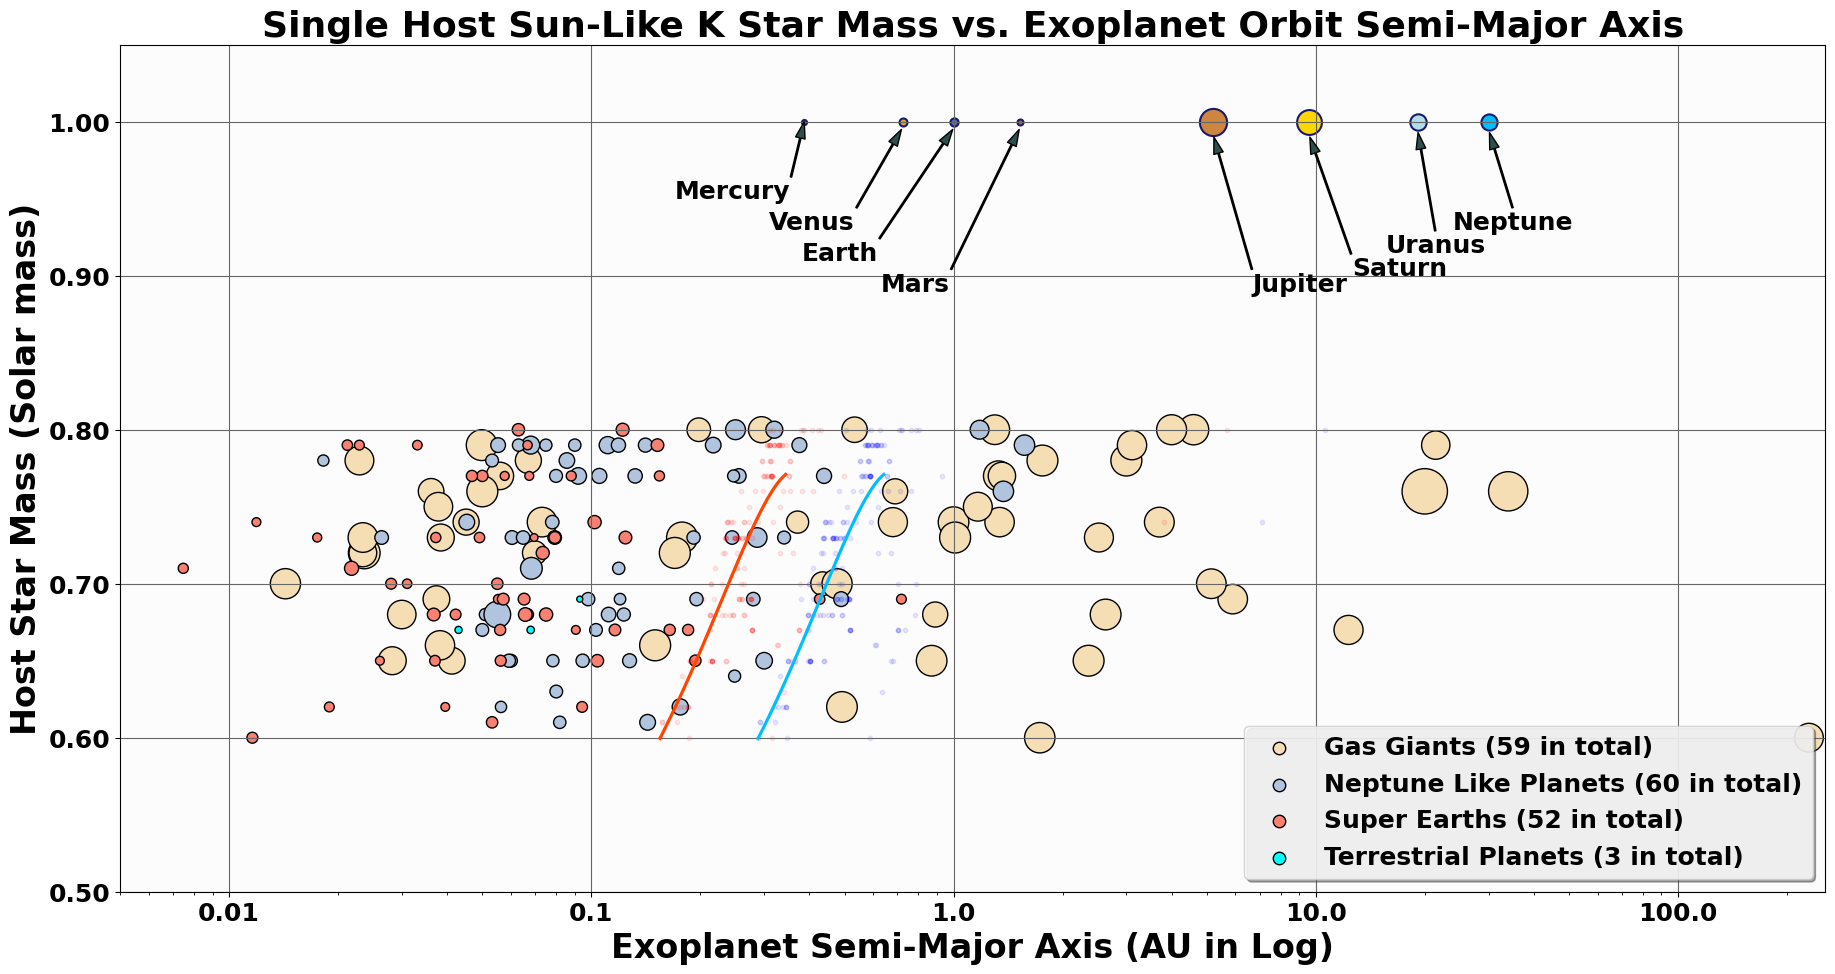

In [122]:
fig = plt.figure(figsize=(22,11))
ax = fig.add_subplot(111, facecolor='0.99', xscale='log')

ax.set_xlim(0.005, 255)
ax.set_ylim(0.5, 1.05)
ax.grid(color='0.4')
ax.set_title('Single Host Sun-Like K Star Mass vs. Exoplanet Orbit Semi-Major Axis', fontweight ='bold')
ax.title.set_fontsize(26)
ax.set_xlabel('Exoplanet Semi-Major Axis (AU in Log)', fontweight ='bold')
ax.xaxis.label.set_fontsize(24)
ax.set_ylabel('Host Star Mass (Solar mass)', fontweight ='bold')
ax.yaxis.label.set_fontsize(24)

# Plot exoplanets
plot_exoplanets_with_size_and_label(ax=ax,
                                    exoplanets_data=st_mass_vs_pl_orbit_plot_data_sun_like_k_stars,
                                    x_field='pl_orbsmax',
                                    y_field='st_mass',
                                    size_field='pl_rade',
                                    type_field='pl_type',
                                    hz_status_field='pl_hz_status',
                                    scale_size=35,
                                    edgecolors='black',
                                    exoplanet_color_map=exoplanet_type_colors,
                                    exoplanet_label_map=sun_like_k_star_host_exoplanet_type_labels)

# Plot habitable zone inner boundaries
plot_exoplanet_hz_zones(ax=ax,
                        exoplanets_data=hz_zone_plot_data_sun_like_k_stars,
                        x_field='hz_zone_inner',
                        y_field='st_mass',
                        type_field='pl_type',
                        scale_size=10,
                        alpha=0.09,
                        exoplanet_color_map=exoplanet_type_with_hz_zone_inner_colors,
                        exoplanet_label_map=exoplanet_type_with_hz_zone_inner_labels)

# Plot habitable zone outer boundaries
plot_exoplanet_hz_zones(ax=ax,
                        exoplanets_data=hz_zone_plot_data_sun_like_k_stars,
                        x_field='hz_zone_outer',
                        y_field='st_mass',
                        type_field='pl_type',
                        scale_size=10,
                        alpha=0.09,
                        exoplanet_color_map=exoplanet_type_with_hz_zone_outer_colors,
                        exoplanet_label_map=exoplanet_type_with_hz_zone_outer_labels)

# Plot Solar system planets
plot_exoplanets_with_size_only(ax=ax,
                               exoplanets_data=solar_system_planets_data,
                               x_field='pl_orbsmax',
                               y_field='st_mass',
                               size_field='pl_rade',
                               type_field='pl_type',
                               hz_status_field='pl_hz_status',
                               scale_size=35,
                               edgecolors='midnightblue',
                               linewidths=1.5,
                               exoplanet_color_map=solar_system_planets_colors,
                               exoplanet_label_map=solar_system_planets_labels)

# Labels for indicating Solar system planets
ax.annotate('Mercury', xy=(0.387, 1), xytext=(0.17, 0.95),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Venus', xy=(0.718, 0.995), xytext=(0.31, 0.93),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Earth', xy=(0.995, 0.995), xytext=(0.38, 0.91),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Mars', xy=(1.518, 0.995), xytext=(0.63, 0.89),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Jupiter', xy=(5.234, 0.99), xytext=(6.7, 0.89),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Saturn', xy=(9.633, 0.99), xytext=(12.6, 0.90),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Uranus', xy=(19.165, 0.993), xytext=(15.6, 0.915),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Neptune', xy=(30.178, 0.993), xytext=(23.96, 0.93),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

# Fit the habitable zone inner boundary with curve
hz_inner_curve_fit_data = hz_zone_plot_data_sun_like_k_stars.loc[
    (hz_zone_plot_data_sun_like_k_stars['hz_zone_inner'] >= 0.01) & (hz_zone_plot_data_sun_like_k_stars['hz_zone_inner'] <= 0.35)]
hz_inner_fit_curve_x, hz_inner_fit_curve_y, hz_inner_poly_coefs = fit_curve(curve_fit_data=hz_inner_curve_fit_data,
                                                                            x_filed='hz_zone_inner',
                                                                            y_field='st_mass',
                                                                            degree=3,
                                                                            num_data_points_to_gen=100)
ax.plot(hz_inner_fit_curve_x, hz_inner_fit_curve_y, color='orangered', linewidth=2.3)

# Fit the habitable zone outer boundary with curve
hz_outer_curve_fit_data = hz_zone_plot_data_sun_like_k_stars.loc[
    (hz_zone_plot_data_sun_like_k_stars['hz_zone_outer'] >= 0.01) & (hz_zone_plot_data_sun_like_k_stars['hz_zone_outer'] <= 0.65)]
hz_outer_fit_curve_x, hz_outer_fit_curve_y, hz_outer_poly_coefs = fit_curve(curve_fit_data=hz_outer_curve_fit_data,
                                                                            x_filed='hz_zone_outer',
                                                                            y_field='st_mass',
                                                                            degree=3,
                                                                            num_data_points_to_gen=100)
ax.plot(hz_outer_fit_curve_x, hz_outer_fit_curve_y, color='deepskyblue', linewidth=2.3)


ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

legend_properties = {'size':18, 'weight':'bold'}
legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='lower right',
                   markerscale=2,
                   shadow=True,
                   framealpha=0.85,
                   prop=legend_properties)
set_legend_size(legend, len(exoplanet_type_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')

In [73]:
st_mass_vs_pl_orbit_plot_data_sun_like_k_stars['hostname'].value_counts()

,count
hostname,
TOI-178,6
Kepler-62,5
Kepler-80,5
HD 23472,5
HD 40307,4
...,...
HD 211970,1
HD 207496,1
HD 192263,1


In [74]:
print(st_mass_vs_pl_orbit_plot_data_sun_like_k_stars['hostname'].unique())

['2MASS J22362452+4751425' 'BD+20 274' 'BD+48 738' 'BD-06 1339'
 'BD-08 2823' 'BD-11 4672' 'BD-17 63' 'BD-210397' 'EPIC 212737443'
 'GJ 143' 'GJ 9714' 'GJ 9827' 'GQ Lup' 'HAT-P-12' 'HAT-P-18' 'HAT-P-20'
 'HAT-P-54' 'HAT-P-68' 'HATS-22' 'HD 102195' 'HD 103197' 'HD 103720'
 'HD 103949' 'HD 108202' 'HD 114386' 'HD 127506' 'HD 128356' 'HD 137388'
 'HD 13808' 'HD 153557' 'HD 156668' 'HD 15906' 'HD 164604' 'HD 176986'
 'HD 181433' 'HD 185283' 'HD 190007' 'HD 192263' 'HD 192310' 'HD 207496'
 'HD 211970' 'HD 215152' 'HD 215497' 'HD 218566' 'HD 219134' 'HD 22496'
 'HD 22781' 'HD 23472' 'HD 27894' 'HD 3651' 'HD 39194' 'HD 40307'
 'HD 48948' 'HD 7199' 'HD 73583' 'HD 7924' 'HD 8326' 'HD 85390' 'HD 93083'
 'HD 95872' 'HIP 34222' 'HIP 35173' 'HIP 4845' 'HIP 54597' 'HIP 57274'
 'HIP 5763' 'HS Psc' 'K2-110' 'K2-141' 'K2-155' 'K2-16' 'K2-17' 'K2-180'
 'K2-216' 'K2-233' 'K2-295' 'K2-35' 'K2-36' 'K2-5' 'K2-8' 'Kepler-61'
 'Kepler-62' 'Kepler-80' 'NGTS-10' 'NGTS-21' 'NGTS-5' 'OGLE-TR-113'
 'PDS 70' 'POTS-

In [75]:
st_mass_vs_pl_orbit_plot_data_sun_like_k_stars['pl_hz_status'].value_counts()

,count
pl_hz_status,
Too Hot,129
Too Cold,34
In HZ,13


In [76]:
# Count number of planets per planets types for each stellar
sun_like_k_star_system_pl_type_count = st_mass_vs_pl_orbit_plot_data_sun_like_k_stars.value_counts(['hostname', 'pl_type']).reset_index(name='pl_type_count')
sun_like_k_star_system_pl_type_stats = pd.DataFrame(sun_like_k_star_system_pl_type_count['hostname'].unique(),
                                                    columns = ['hostname'])

sun_like_k_star_system_terrestrial_pl_count = sun_like_k_star_system_pl_type_count.loc[
    (sun_like_k_star_system_pl_type_count['pl_type'] == 'Terrestrial')]
sun_like_k_star_system_pl_type_stats = pd.merge(sun_like_k_star_system_pl_type_stats,
                           sun_like_k_star_system_terrestrial_pl_count[['pl_type_count']],
                           how="left",
                           left_on=sun_like_k_star_system_pl_type_stats['hostname'].str.lower(),
                           right_on=sun_like_k_star_system_terrestrial_pl_count['hostname'].str.lower())
sun_like_k_star_system_pl_type_stats.columns = ['key', 'hostname', 'terrestrial_pl_count']
sun_like_k_star_system_pl_type_stats = sun_like_k_star_system_pl_type_stats.drop(['key'], axis = 1)

sun_like_k_star_system_super_earth_pl_count = sun_like_k_star_system_pl_type_count.loc[
    (sun_like_k_star_system_pl_type_count['pl_type'] == 'Super-Earth')]
sun_like_k_star_system_pl_type_stats = pd.merge(sun_like_k_star_system_pl_type_stats,
                           sun_like_k_star_system_super_earth_pl_count[['pl_type_count']],
                           how="left",
                           left_on=sun_like_k_star_system_pl_type_stats['hostname'].str.lower(),
                           right_on=sun_like_k_star_system_super_earth_pl_count['hostname'].str.lower())
sun_like_k_star_system_pl_type_stats.columns = ['key', 'hostname', 'terrestrial_pl_count', 'super_earth_pl_count']
sun_like_k_star_system_pl_type_stats = sun_like_k_star_system_pl_type_stats.drop(['key'], axis = 1)

sun_like_k_star_system_neptune_like_pl_count = sun_like_k_star_system_pl_type_count.loc[
    (sun_like_k_star_system_pl_type_count['pl_type'] == 'Neptune-Like')]
sun_like_k_star_system_pl_type_stats = pd.merge(sun_like_k_star_system_pl_type_stats,
                           sun_like_k_star_system_neptune_like_pl_count[['pl_type_count']],
                           how="left",
                           left_on=sun_like_k_star_system_pl_type_stats['hostname'].str.lower(),
                           right_on=sun_like_k_star_system_neptune_like_pl_count['hostname'].str.lower())
sun_like_k_star_system_pl_type_stats.columns = ['key',
                                                'hostname',
                                                'terrestrial_pl_count',
                                                'super_earth_pl_count',
                                                'neptune_like_pl_count']
sun_like_k_star_system_pl_type_stats = sun_like_k_star_system_pl_type_stats.drop(['key'], axis = 1)

sun_like_k_star_system_gas_giant_pl_count = sun_like_k_star_system_pl_type_count.loc[
    (sun_like_k_star_system_pl_type_count['pl_type'] == 'Gas-Giant')]
sun_like_k_star_system_pl_type_stats = pd.merge(sun_like_k_star_system_pl_type_stats,
                           sun_like_k_star_system_gas_giant_pl_count[['pl_type_count']],
                           how="left",
                           left_on=sun_like_k_star_system_pl_type_stats['hostname'].str.lower(),
                           right_on=sun_like_k_star_system_gas_giant_pl_count['hostname'].str.lower())
sun_like_k_star_system_pl_type_stats.columns = ['key',
                                                'hostname',
                                                'terrestrial_pl_count',
                                                'super_earth_pl_count',
                                                'neptune_like_pl_count',
                                                'gas_giant_pl_count']
sun_like_k_star_system_pl_type_stats = sun_like_k_star_system_pl_type_stats.drop(['key'], axis = 1)

sun_like_k_star_system_pl_type_stats.fillna(0, inplace=True)
print(sun_like_k_star_system_pl_type_stats)

      hostname  terrestrial_pl_count  super_earth_pl_count  \
0    HD 215152                   0.0                   4.0   
1    Kepler-62                   1.0                   3.0   
2     HD 40307                   0.0                   1.0   
3    Kepler-80                   0.0                   3.0   
4      TOI-178                   0.0                   3.0   
..         ...                   ...                   ...   
103  HD 207496                   0.0                   1.0   
104  HD 192263                   0.0                   0.0   
105  HD 190007                   0.0                   0.0   
106  HD 185283                   0.0                   0.0   
107   Wolf 503                   0.0                   1.0   

     neptune_like_pl_count  gas_giant_pl_count  
0                      0.0                 0.0  
1                      1.0                 0.0  
2                      3.0                 0.0  
3                      2.0                 0.0  
4         

In [77]:
sun_like_k_star_system_pl_type_stats['st_system_class'] = 'N/A'

# Class 1 stellar system: at least one Terrestrial + at least one Neptune-Like or Gas-Giant
sun_like_k_star_system_pl_type_stats.loc[
    (sun_like_k_star_system_pl_type_stats['terrestrial_pl_count'] > 0)
        & ((sun_like_k_star_system_pl_type_stats['neptune_like_pl_count'] > 0) | (sun_like_k_star_system_pl_type_stats['gas_giant_pl_count'] > 0)),
    'st_system_class'] = 'Class 1'

# Class 2 stellar system: no Terrestrial, at least one Super-Earth + at least one Neptune-Like or Gas-Giant
sun_like_k_star_system_pl_type_stats.loc[
    ((sun_like_k_star_system_pl_type_stats['terrestrial_pl_count'] == 0) & (sun_like_k_star_system_pl_type_stats['super_earth_pl_count'] > 0))
        & ((sun_like_k_star_system_pl_type_stats['neptune_like_pl_count'] > 0) | (sun_like_k_star_system_pl_type_stats['gas_giant_pl_count'] > 0)),
    'st_system_class'] = 'Class 2'

# Class 3 stellar system: only Terrestrial or Super-Earth
sun_like_k_star_system_pl_type_stats.loc[
    ((sun_like_k_star_system_pl_type_stats['terrestrial_pl_count'] > 0) | (sun_like_k_star_system_pl_type_stats['super_earth_pl_count'] > 0))
        & ((sun_like_k_star_system_pl_type_stats['neptune_like_pl_count'] == 0) & (sun_like_k_star_system_pl_type_stats['gas_giant_pl_count'] == 0)),
    'st_system_class'] = 'Class 3'

# Class 4 stellar system: only Neptune-Like or Gas-Giant
sun_like_k_star_system_pl_type_stats.loc[
    ((sun_like_k_star_system_pl_type_stats['terrestrial_pl_count'] == 0) & (sun_like_k_star_system_pl_type_stats['super_earth_pl_count'] == 0))
        & ((sun_like_k_star_system_pl_type_stats['neptune_like_pl_count'] > 0) | (sun_like_k_star_system_pl_type_stats['gas_giant_pl_count'] > 0)),
    'st_system_class'] = 'Class 4'

sun_like_k_star_system_pl_type_stats['st_system_class'].value_counts().sort_index()

,count
st_system_class,
Class 1,1
Class 2,17
Class 3,15
Class 4,75


In [78]:
sun_like_k_star_system_pl_type_stats.to_csv(
    '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/StellarSystemClassification/SunLikeKStellarSystemPlanetTypeStats-0.6-0.8.csv'
)

<Axes: title={'center': 'Number of Sun-Like K Stellar Systems by Stellar System Class'}, xlabel='Stellar System Class', ylabel='Number of Stellar Systems'>

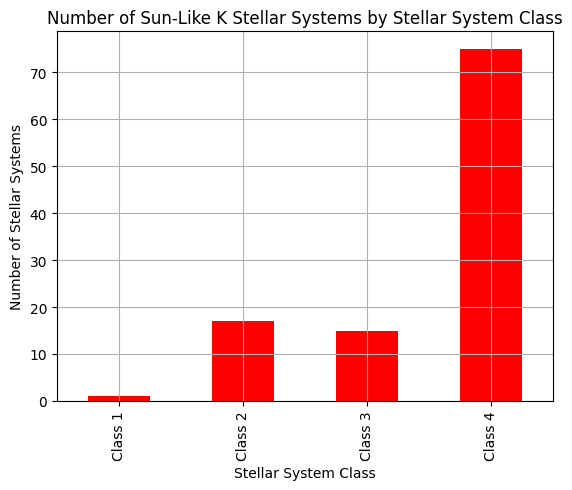

In [80]:
sun_like_k_star_system_pl_type_stats['st_system_class'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Stellar System Class',
    ylabel='Number of Stellar Systems',
    title='Number of Sun-Like K Stellar Systems by Stellar System Class',
    grid=True)

In [81]:
st_mass_vs_pl_orbit_plot_data_sun_like_k_stars = pd.merge(st_mass_vs_pl_orbit_plot_data_sun_like_k_stars,
                                                          sun_like_k_star_system_pl_type_stats[['st_system_class']],
                                                          how="left",
                                                          left_on=st_mass_vs_pl_orbit_plot_data_sun_like_k_stars['hostname'].str.lower(),
                                                          right_on=sun_like_k_star_system_pl_type_stats['hostname'].str.lower())
st_mass_vs_pl_orbit_plot_data_sun_like_k_stars = st_mass_vs_pl_orbit_plot_data_sun_like_k_stars.drop(['key_0'], axis = 1)

In [82]:
st_mass_vs_pl_orbit_plot_data_sun_like_k_stars.to_csv(
    '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/StellarSystemClassification/SunLikeKStellarSystemData-0.6-0.8.csv'
)

In [85]:
def plot_a_stellar_system(st_mass_vs_pl_orbit_plot_data,
                          plot_title,
                          exoplanet_color_map,
                          exoplanet_label_map,
                          legend_loc='lower right'):
    fig = plt.figure(figsize=(11,6))
    ax = fig.add_subplot(111, facecolor='0.99', xscale='log')

    ax.set_xlim(0.005, 255)
    ax.set_ylim(0.58, 1.05)
    ax.grid(color='0.4')
    ax.set_title(plot_title, fontweight ='bold')
    ax.title.set_fontsize(18)
    ax.set_xlabel('Exoplanet Semi-Major Axis (AU in Log)', fontweight ='bold')
    ax.xaxis.label.set_fontsize(15)
    ax.set_ylabel('Host Star Mass (Solar mass)', fontweight ='bold')
    ax.yaxis.label.set_fontsize(15)

    # Plot exoplanets
    plot_exoplanets_with_size_and_label(ax=ax,
                                        exoplanets_data=st_mass_vs_pl_orbit_plot_data,
                                        x_field='pl_orbsmax',
                                        y_field='st_mass',
                                        size_field='pl_rade',
                                        type_field='pl_type',
                                        hz_status_field='pl_hz_status',
                                        scale_size=35,
                                        edgecolors='black',
                                        exoplanet_color_map=exoplanet_color_map,
                                        exoplanet_label_map=exoplanet_label_map)

    # Plot habitable zone inner and outer boundaries
    hz_inner_boundary_x = st_mass_vs_pl_orbit_plot_data['hz_zone_inner'].to_numpy()[0]
    hz_outer_boundary_x = st_mass_vs_pl_orbit_plot_data['hz_zone_outer'].to_numpy()[0]
    plt.vlines(x=hz_inner_boundary_x, ymin=0.58, ymax=1.05, colors='green', linestyles='dashed', label='Habitable Zone')
    plt.vlines(x=hz_outer_boundary_x, ymin=0.58, ymax=1.05, colors='green', linestyles='dashed')
    ax.add_patch(plt.Rectangle(xy=(hz_inner_boundary_x, 0.58),
                               width=hz_outer_boundary_x - hz_inner_boundary_x,
                               height=0.47,
                               color='lightgreen',
                               alpha=0.15))

    ax.set_yticklabels(ax.get_yticks(), weight='bold', size=15)
    ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=15)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

    legend_properties = {'size':13, 'weight':'bold'}
    legend = ax.legend(scatterpoints=1,
                      labelcolor='black',
                      loc=legend_loc,
                      markerscale=2,
                      shadow=True,
                      framealpha=0.85,
                      prop=legend_properties)
    set_legend_size(legend, len(exoplanet_label_map), 80)

    frame = legend.get_frame()
    frame.set_facecolor('0.99')

def plot_stellar_systems(plot_data,
                         host_star_names,
                         exoplanet_color_map,
                         exoplanet_label_map,
                         legend_loc='lower right'):
  for host_star_name in host_star_names:
      plot_title=f"Star Mass vs. Exoplanet Orbit Semi-Major Axis: {host_star_name} System"
      plot_data_one_stellar_system = plot_data.loc[(plot_data['hostname'] == host_star_name)]
      plot_a_stellar_system(st_mass_vs_pl_orbit_plot_data=plot_data_one_stellar_system,
                            plot_title=plot_title,
                            exoplanet_color_map=exoplanet_color_map,
                            exoplanet_label_map=exoplanet_label_map,
                            legend_loc=legend_loc)

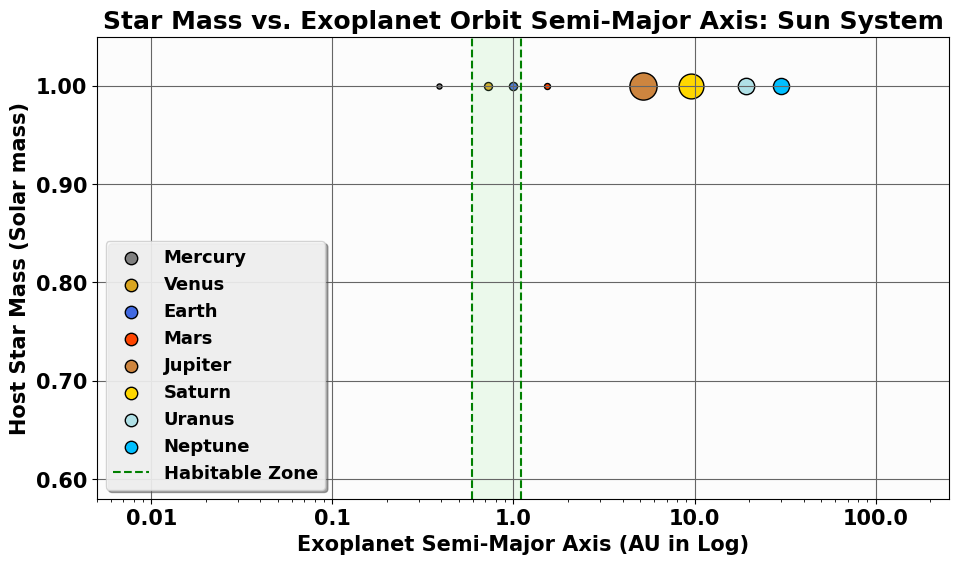

In [130]:
# Plot Solar System
host_star_names = ['Sun']
plot_stellar_systems_in_grid(plot_data=solar_system_planets_data,
                             host_star_names=host_star_names,
                             figsize_width=11,
                             figsize_height=6,
                             grid_rows=1,
                             grid_columns=1,
                             subplot_xlim_min=0.005,
                             subplot_xlim_max=255,
                             subplot_ylim_min=0.58,
                             subplot_ylim_max=1.05,
                             exoplanet_color_map=solar_system_planets_colors,
                             exoplanet_label_map=solar_system_planets_labels,
                             legend_loc='lower left')

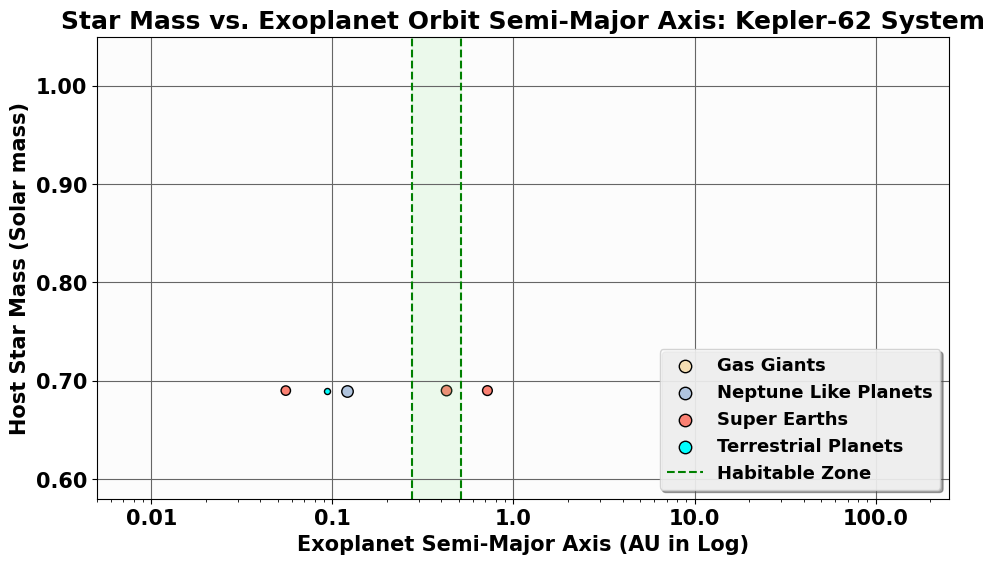

In [131]:
# Plot class 1 stellar systems
host_star_names = sun_like_k_star_system_pl_type_stats.loc[(sun_like_k_star_system_pl_type_stats['st_system_class'] == 'Class 1')]['hostname'].to_numpy()
plot_stellar_systems_in_grid(plot_data=st_mass_vs_pl_orbit_plot_data_sun_like_k_stars,
                             host_star_names=host_star_names,
                             figsize_width=11,
                             figsize_height=6,
                             grid_rows=1,
                             grid_columns=1,
                             subplot_xlim_min=0.005,
                             subplot_xlim_max=255,
                             subplot_ylim_min=0.58,
                             subplot_ylim_max=1.05,
                             exoplanet_color_map=exoplanet_type_colors,
                             exoplanet_label_map=stellar_system_exoplanet_type_labels)

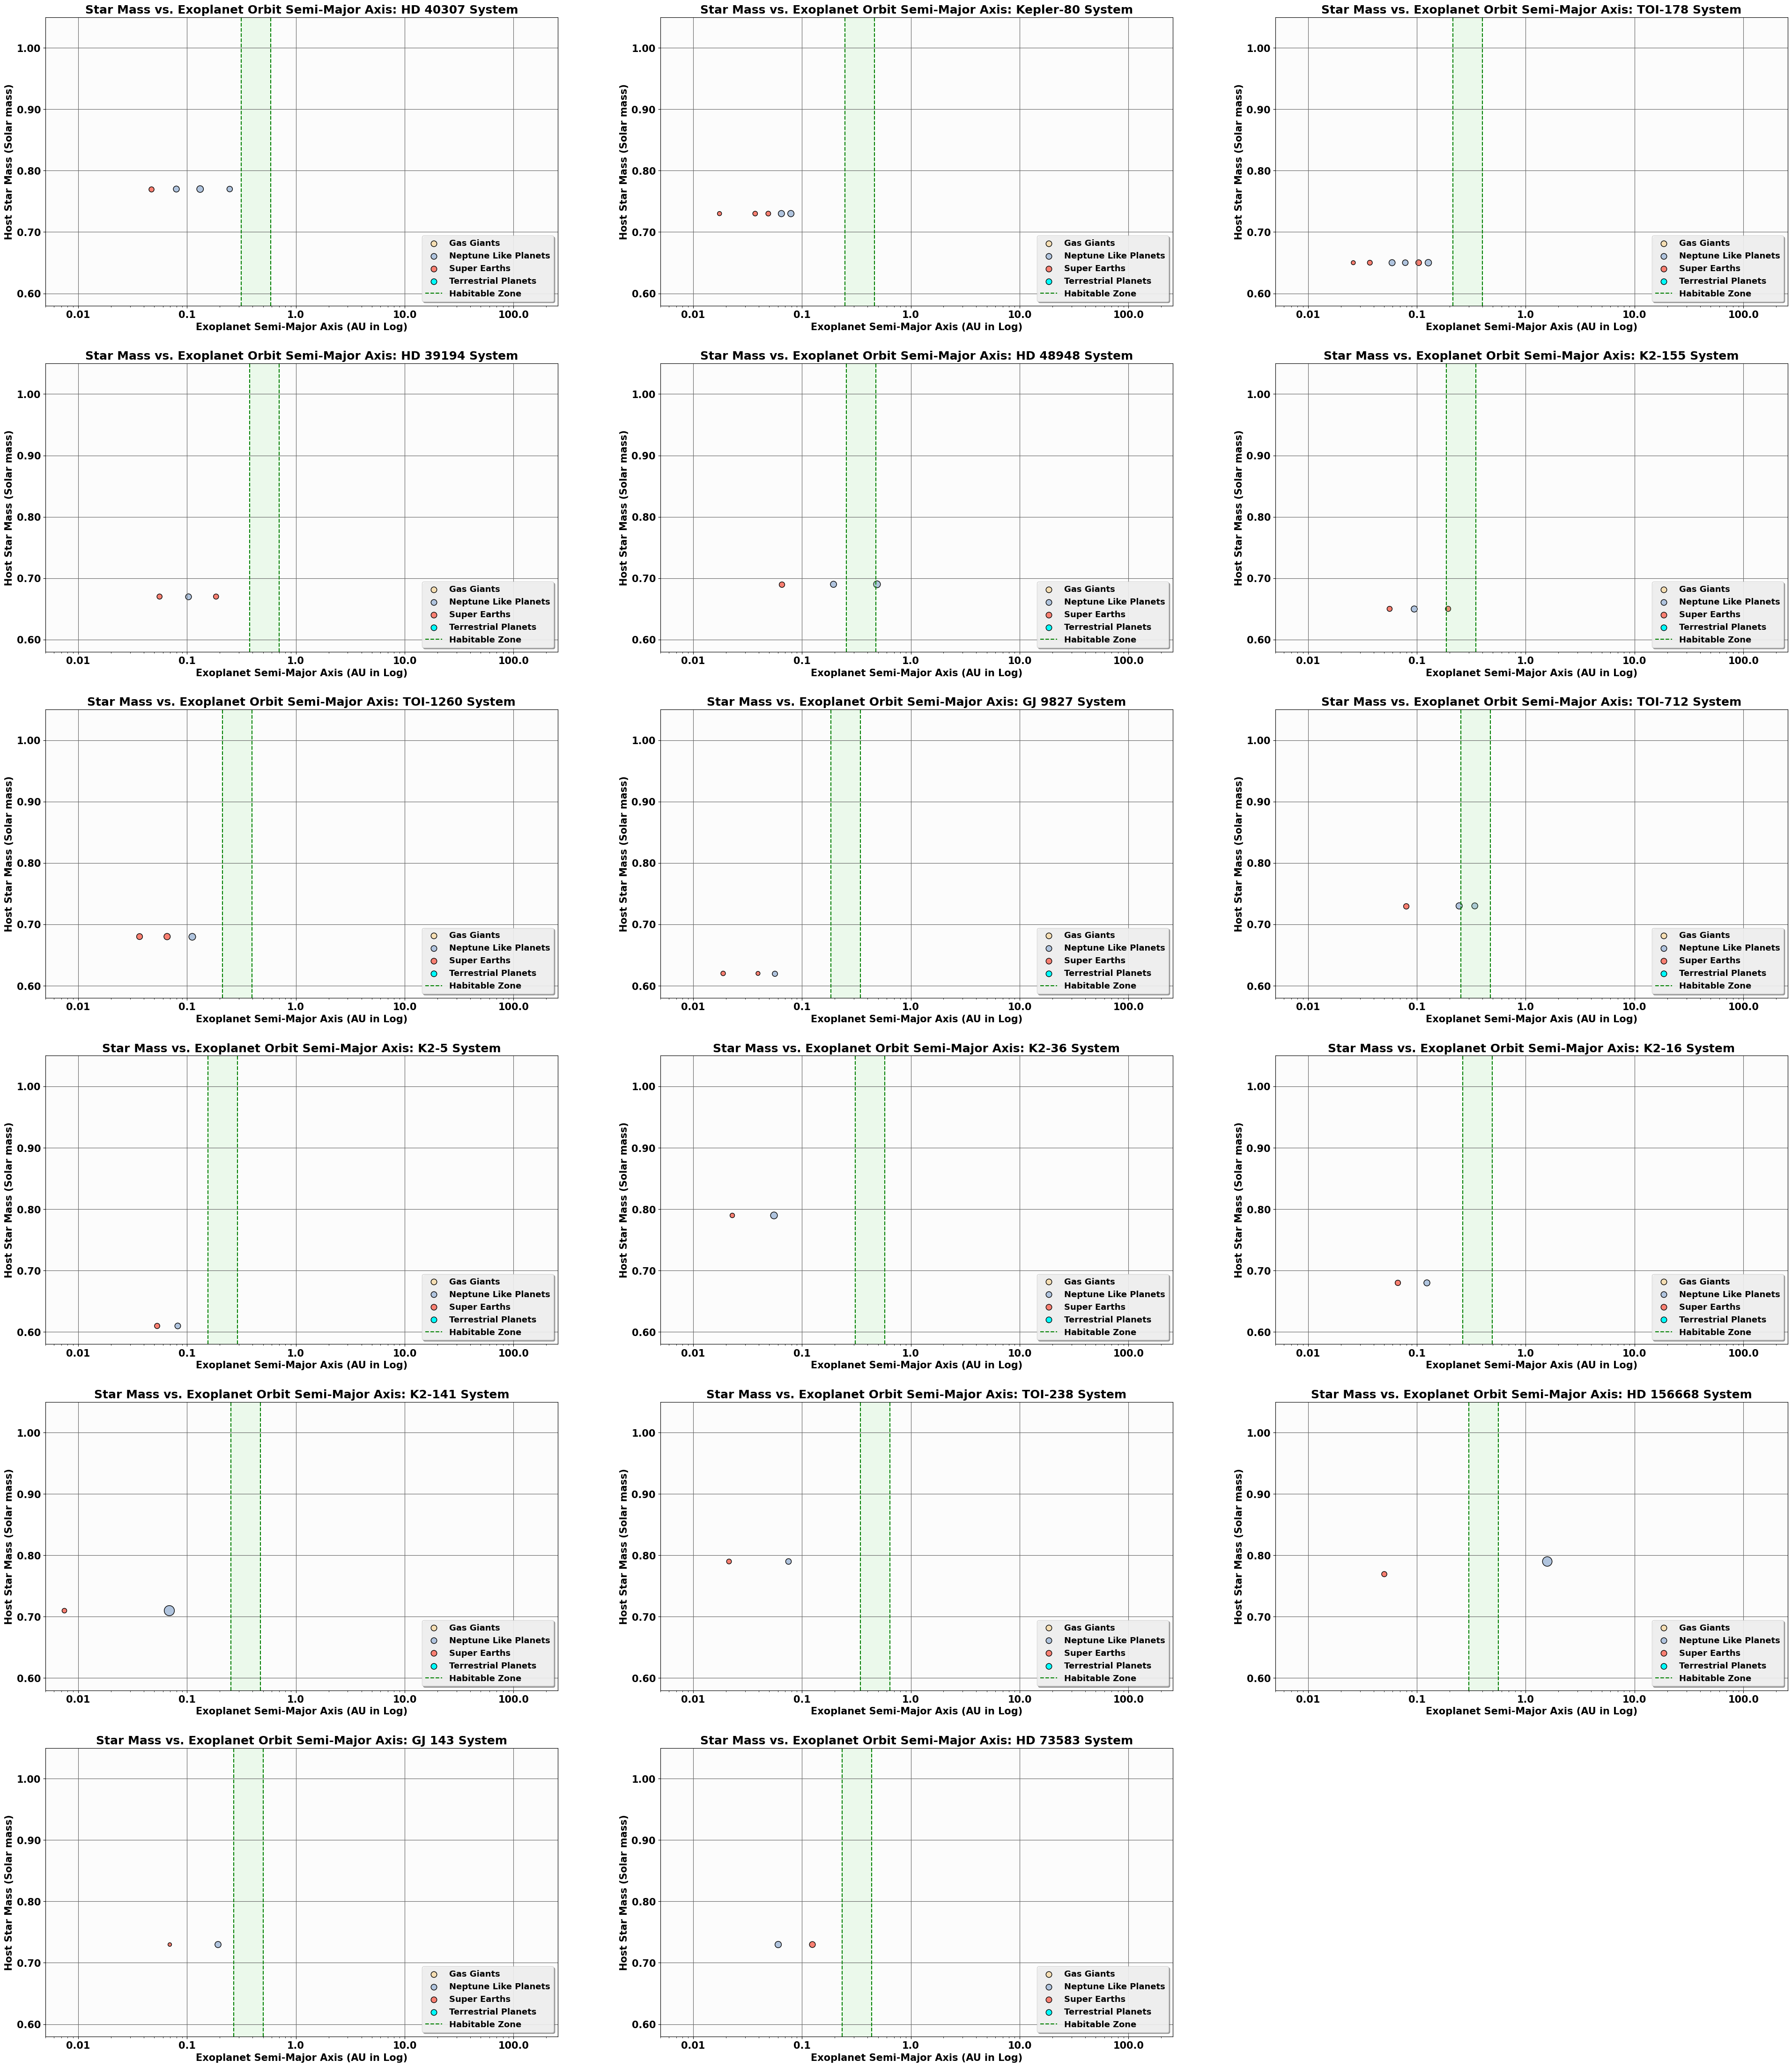

In [133]:
# Plot class 2 stellar systems
host_star_names = sun_like_k_star_system_pl_type_stats.loc[(sun_like_k_star_system_pl_type_stats['st_system_class'] == 'Class 2')]['hostname'].to_numpy()
plot_stellar_systems_in_grid(plot_data=st_mass_vs_pl_orbit_plot_data_sun_like_k_stars,
                             host_star_names=host_star_names,
                             figsize_width=48,
                             figsize_height=56,
                             grid_rows=6,
                             grid_columns=3,
                             subplot_xlim_min=0.005,
                             subplot_xlim_max=255,
                             subplot_ylim_min=0.58,
                             subplot_ylim_max=1.05,
                             exoplanet_color_map=exoplanet_type_colors,
                             exoplanet_label_map=stellar_system_exoplanet_type_labels)

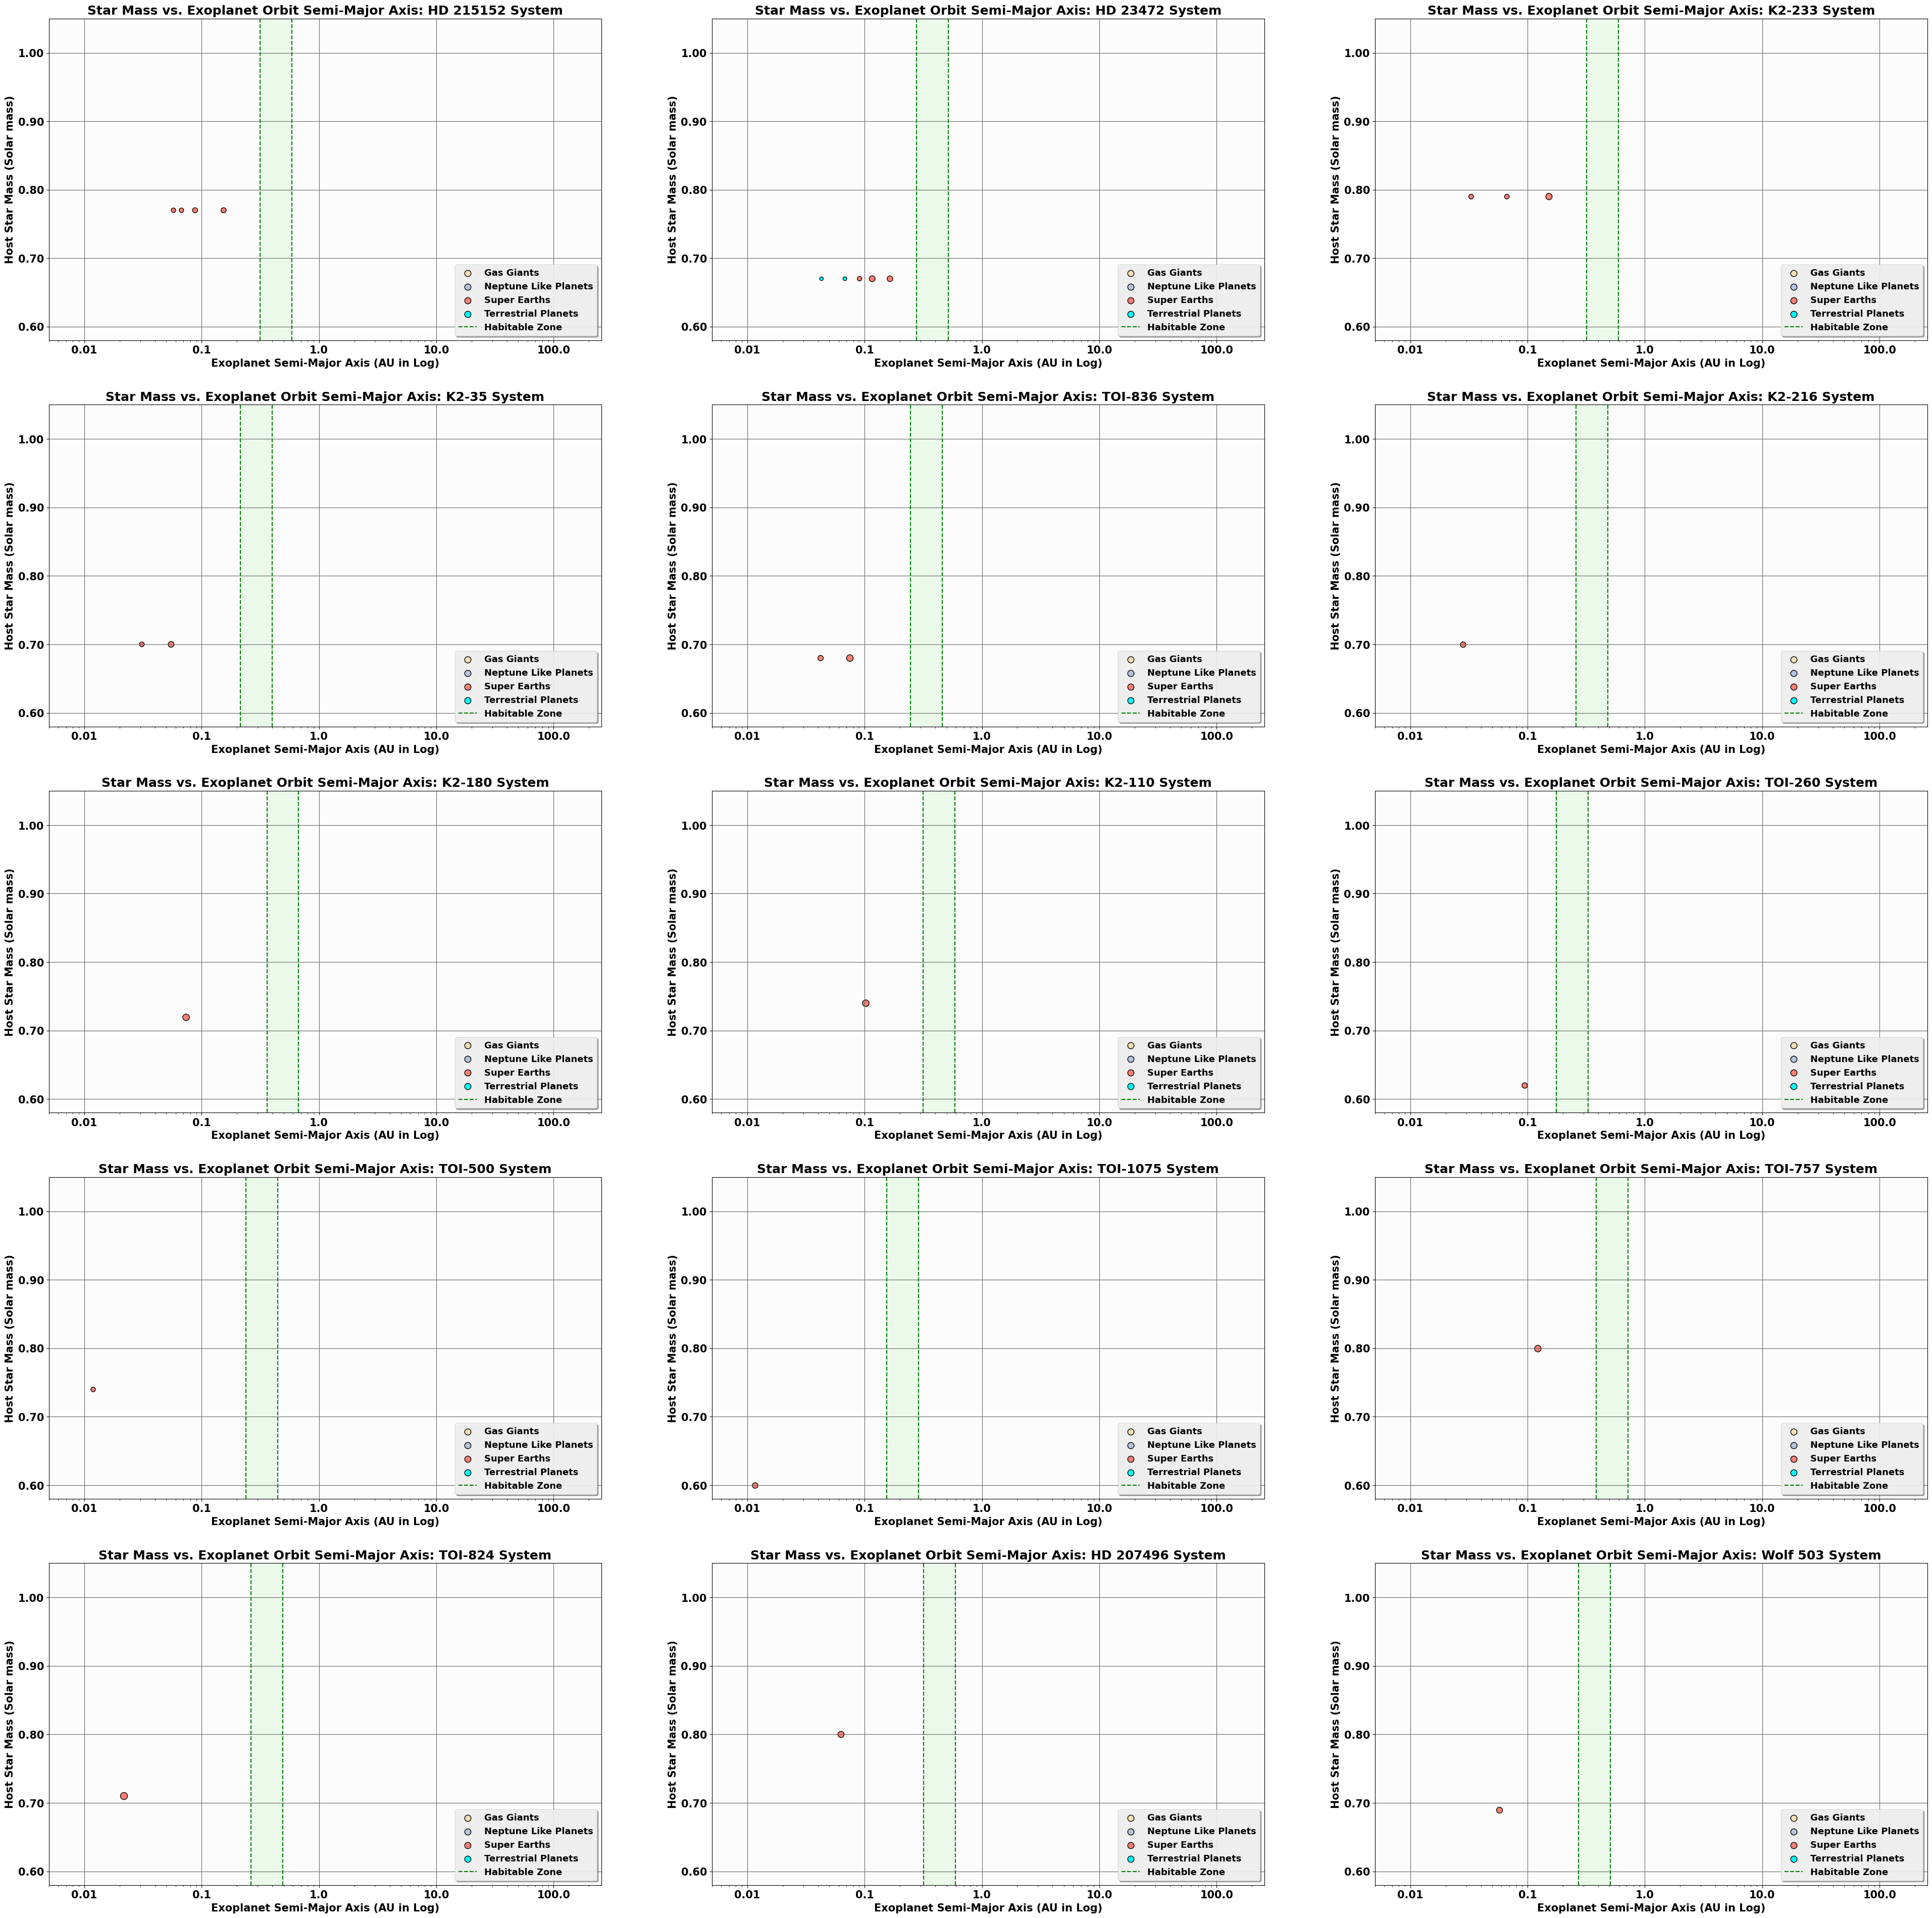

In [136]:
# Plot class 3 stellar systems
host_star_names = sun_like_k_star_system_pl_type_stats.loc[(sun_like_k_star_system_pl_type_stats['st_system_class'] == 'Class 3')]['hostname'].to_numpy()
plot_stellar_systems_in_grid(plot_data=st_mass_vs_pl_orbit_plot_data_sun_like_k_stars,
                             host_star_names=host_star_names,
                             figsize_width=48,
                             figsize_height=48,
                             grid_rows=5,
                             grid_columns=3,
                             subplot_xlim_min=0.005,
                             subplot_xlim_max=255,
                             subplot_ylim_min=0.58,
                             subplot_ylim_max=1.05,
                             exoplanet_color_map=exoplanet_type_colors,
                             exoplanet_label_map=stellar_system_exoplanet_type_labels)